In [2]:
import requests
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt

In [3]:
resp = requests.get('https://groundhog-day.com/api/v1/groundhogs')
hogs = pd.DataFrame(resp.json()['groundhogs'])
hogs = hogs.drop(['predictions'], axis=1)
hogs.to_csv('hogs.csv', index=False)

In [4]:
hogs['latitude'] = pd.to_numeric(hogs['coordinates'].str.split(',').str[0])
hogs['longitude'] = pd.to_numeric(hogs['coordinates'].str.split(',').str[1])

<Axes: >

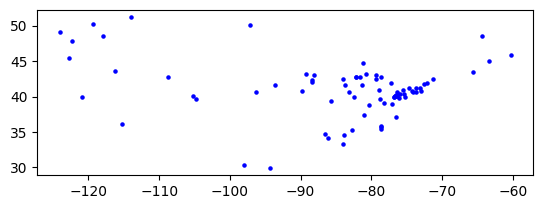

In [5]:
import geopandas as gpd
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(hogs,
                      geometry=gpd.points_from_xy(hogs.longitude,
                                                 hogs.latitude))

gdf.plot(marker='o', color='b', markersize=5)

In [6]:
hogs['latitude'].astype('float')

0     40.931199
1     39.825541
2     44.743869
3     43.182632
4     37.424596
        ...    
75    35.243478
76    39.652866
77    40.683400
78    42.115702
79    40.121325
Name: latitude, Length: 80, dtype: float64

In [7]:

map = folium.Map(location=[hogs['latitude'].mean(), hogs['longitude'].mean()], zoom_start=4)

for _, row in hogs.query('isGroundhog == 1').iterrows():
    folium.Marker(location=[row['latitude'], 
                            row['longitude']], 
                  popup=row['slug'], icon=folium.Icon(color="green")).add_to(map)
    
for _, row in hogs.query('isGroundhog !=1').iterrows():
    folium.Marker(location=[row['latitude'], 
                            row['longitude']], 
                  popup=row['slug'], icon=folium.Icon(color="blue")).add_to(map)
    
map

<Axes: title={'center': 'Count by Prognosticator Type'}, ylabel='type'>

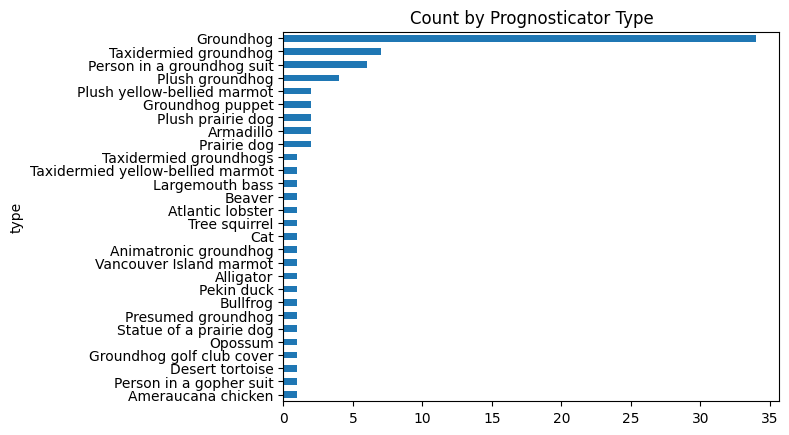

In [8]:
hogs['type'].value_counts().sort_values(ascending=True).plot(kind='barh',
                                                            title='Count by Prognosticator Type')

In [13]:
# Explode out Predictions from each Prognosticator

In [9]:
progs = pd.DataFrame(resp.json()['groundhogs'])
dfs = []
for i, d in progs.iterrows():
    df = pd.DataFrame(d['predictions'])
    df = df.assign(**d[['id', 'slug']].to_dict())[['id','slug','year','shadow','details']]
    df.to_csv(f'{d["slug"]}.csv', index=False)
    dfs.append(df)

In [10]:
df_all = pd.concat(dfs).reset_index(drop=True).copy()

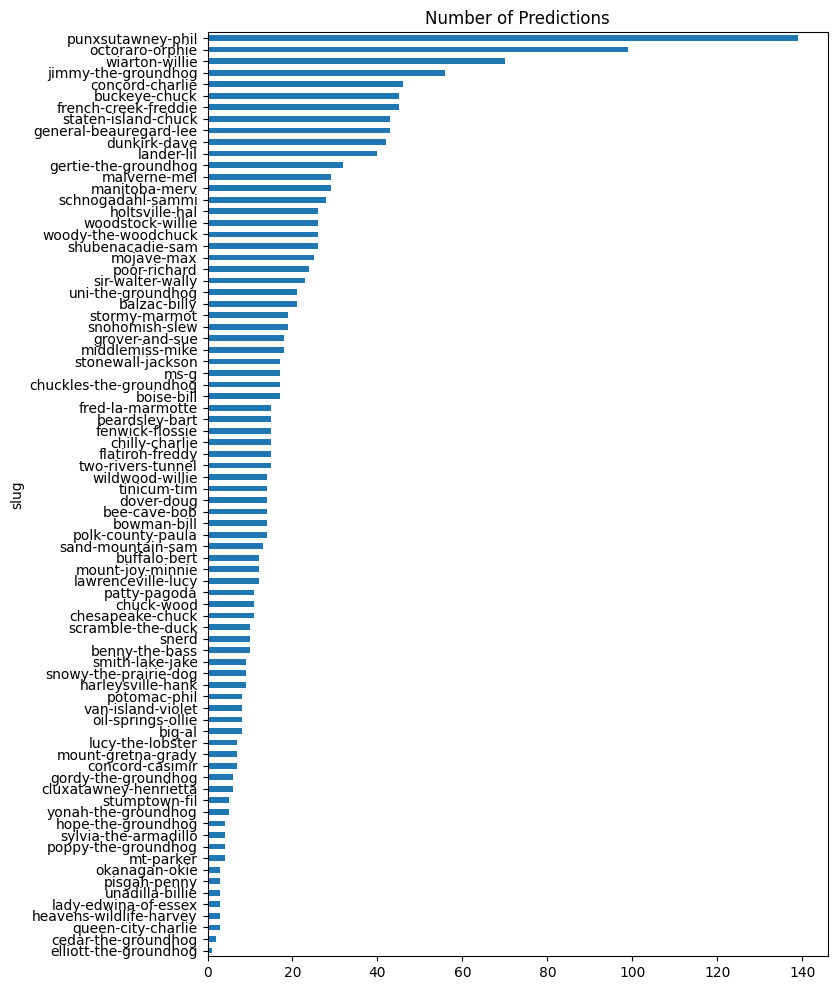

In [11]:
df_all['slug'].value_counts().sort_values(ascending=True) \
.plot(kind='barh', figsize=(8, 12), title='Number of Predictions')
plt.show()